In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
timeval = ['time', 'value']
files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_starts_compressor1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
#files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz']
cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'starts_compressor1', 'state', 'extended_state']
state_converter = lambda x: (sys.intern(x.split(":")[0]))
converters = {'data/heatpump_state.csv.gz': state_converter, 'data/heatpump_extended_state.csv.gz': state_converter}
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2016-01-16'), pd.to_datetime('2020-12-25'),freq='1m')})
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2020-12-20'), pd.to_datetime('2020-12-21'),freq='1m')})
merged_df = pd.DataFrame()

for i, file in enumerate(files):
    print(file)
    with gzip.open(file, "rb") as f:
        df = pd.read_csv(f, sep=';', parse_dates=True, index_col=timeval[0], names=timeval, converters={timeval[1]: converters.get(file)})

    df.info(verbose=False)

    #df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') # see parse_dates = True above
    df['value'] = pd.SparseArray(df['value'].values) # , dtype=df['value'].dtype)
    df.rename(columns={"value": cols[i]}, inplace=True)

    #df.sort_values('time', inplace=True)
    #df.set_index('time', inplace=True)
  
    #df = df[(df.index > '2020-12-10 12:00:00') & (df.index < '2020-12-10 15:00:00')] # Filter

    print(df)

#    if i == 0:
#        merged_df = df
#    else:
#       merged_df = pd.merge_asof(merged_df.sort_values('time'), df, on='time', tolerance=pd.Timedelta("1m"))
    merged_df = merged_df.merge(df, how='outer', left_index=True, right_index=True)
    #print('df_merged memory usage : {}'.format(merged_df.memory_usage()/1000))

#merged_df.set_index('time', inplace=True)


data/heatpump_temperature_1.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2071709 entries, 2016-01-16 14:35:50 to 2020-12-24 23:05:45
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 31.6 MB
                     outside
time                        
2016-01-16 14:35:50     13.8
2016-01-16 14:36:00     13.9
2016-01-16 14:36:50     13.8
2016-01-16 14:37:01     13.9
2016-01-16 14:37:51     13.8
...                      ...
2020-12-24 22:57:30     11.9
2020-12-24 23:03:14     12.0
2020-12-24 23:03:24     11.9
2020-12-24 23:05:35     12.0
2020-12-24 23:05:45     11.9

[2071709 rows x 1 columns]
data/heatpump_temperature_2.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1709698 entries, 2016-01-16 14:36:20 to 2020-12-25 01:04:52
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 26.1 MB
                     return
time                       
2016-01-16 14:36:20    28.9
2016-01-16 14:36:30    28.8
2016-01-16 14:36:40    28.9
2016-01

In [14]:

display(merged_df)


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,state,extended_state
time,,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,1447.0,Heatpump running,heating
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,NaN,Heatpump running,heating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,NaN,Heatpump stopped,standby
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,NaN,Heatpump stopped,standby
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,NaN,Heatpump stopped,standby


In [35]:
#merged_df[merged_df['extended_state'] == 'unknown']['extended_state'] = 'compressor heating up'

#merged_df['compressor_heating'] = 
#merged_df[(merged_df['extended_state'] == 'compressor heating up') | (merged_df['extended_state'] == 'unknown')]['extended_state']


#test = pd.DataFrame()
#test['compressor_heating'] = merged_df[(merged_df['extended_state'] == 'compressor heating up') | (merged_df['extended_state'] == 'unknown')]['extended_state']
#test

#(merged_df['extended_state'] == 'compressor heating up') 
#es = merged_df['extended_state']
#es[es == 'compressor heating up']



#display(pd.get_dummies(merged_df['state']))
#display(pd.get_dummies(merged_df['extended_state']))


,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
2016-01-16 14:35:50,0,0,1,0,1
2016-01-16 14:36:00,0,0,1,0,1
2016-01-16 14:36:10,0,0,1,0,1
2016-01-16 14:36:20,0,0,1,0,1
2016-01-16 14:36:30,0,0,1,0,1
...,...,...,...,...,...
2020-12-25 01:04:22,0,0,0,0,0
2020-12-25 01:04:32,0,0,0,0,0
2020-12-25 01:04:42,0,0,0,0,0
2020-12-25 01:04:52,0,0,0,0,0


In [15]:
#merged_df['compressor_heating'] = merged_df['extended_state'].str.contains('compressor heating up') | merged_df['extended_state'].str.contains('unknown')
#merged_df['defrosting'] = merged_df['extended_state'].str.contains('defrosting')
#merged_df['heatpump_running'] = merged_df['state'].str.contains('Heatpump running')
#merged_df['heatpump_heating'] = merged_df['extended_state'].str.contains('heating')
#merged_df['heatpump_servicewater'] = merged_df['extended_state'].str.contains('service water')
dummies_state = pd.get_dummies(merged_df['state'], sparse=True)
dummies_extended_state = pd.get_dummies(merged_df['extended_state'], sparse=True)
merged_df['compressor_heating'] = dummies_extended_state['compressor heating up'] | dummies_extended_state['unknown']
merged_df['defrosting'] = dummies_extended_state['defrosting']
merged_df['heatpump_heating'] = dummies_extended_state['heating']
merged_df['heatpump_servicewater'] = dummies_extended_state['service water']
merged_df['heatpump_running'] = dummies_state['Heatpump running']
merged_df.drop(columns=['state'], inplace=True)
merged_df.drop(columns=['extended_state'], inplace=True)
merged_df

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,1447.0,0,0,1,0,1
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,NaN,0,0,1,0,1
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,NaN,0,0,0,0,0
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,NaN,0,0,0,0,0
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,NaN,0,0,0,0,0


In [45]:
merged_df[merged_df['compressor_heating']==1]

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,mk1_reference,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,,
2016-01-17 06:45:54,NaN,20.0,NaN,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2016-01-17 06:46:04,NaN,NaN,NaN,19.3,NaN,NaN,34.7,NaN,NaN,20.7,NaN,NaN,1,0,0,0,0
2016-01-17 06:46:15,NaN,NaN,NaN,19.8,NaN,NaN,34.8,NaN,NaN,20.6,NaN,NaN,1,0,0,0,0
2016-01-17 06:46:25,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,20.5,NaN,NaN,1,0,0,0,0
2016-01-17 06:46:35,NaN,20.1,NaN,NaN,NaN,NaN,34.7,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 12:46:01,NaN,NaN,NaN,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2020-12-24 12:46:10,NaN,21.8,NaN,21.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2020-12-24 12:46:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,1,0,0,0,0


In [16]:
display(merged_df.dtypes)
merged_df.info(verbose=False, memory_usage="deep")

outside                   Sparse[float64, nan]
return                    Sparse[float64, nan]
reference_return          Sparse[float64, nan]
supply                    Sparse[float64, nan]
servicewater_reference    Sparse[float64, nan]
servicewater              Sparse[float64, nan]
return_external           Sparse[float64, nan]
hot_gas                   Sparse[float64, nan]
probe_in                  Sparse[float64, nan]
mk1                       Sparse[float64, nan]
starts_compressor1          Sparse[float64, 0]
compressor_heating            Sparse[uint8, 0]
defrosting                    Sparse[uint8, 0]
heatpump_heating              Sparse[uint8, 0]
heatpump_servicewater         Sparse[uint8, 0]
heatpump_running              Sparse[uint8, 0]
dtype: object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16466728 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 16 entries, outside to heatpump_running
dtypes: Sparse[float64, 0](1), Sparse[float64, nan](10), Sparse[uint8, 0](5)
memory usage: 496.0 MB


In [17]:
def extract_window(df, time1, time2):
    #window = df[(df.index >= time1) & (df.index <= time2)].sparse.to_dense()
    window = df[time1 : time2].sparse.to_dense()
    idx_window = df.index.get_loc(window.iloc[0].name)
    for column in df.columns:
#        print("### First Val: {}".format(window[column].iloc[0]))
        if pd.isna(window[column].iloc[0]):
            for i in range(idx_window, -1, -1):
                lastValue = df[column].iloc[i]

                if not pd.isna(lastValue):
#                    print("### lastValue {}".format(lastValue))
                    break;
            window[column].iloc[0] = lastValue
    return window

win = extract_window(merged_df, '2020-12-10 12:00:00', '2020-12-10 15:00:00')
display(win)

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [61]:
df_defrosting = merged_df[merged_df['defrosting']==True]
#df_defrosting.groupby(by=[df_defrosting.index.month, df_defrosting.index.year])['defrosting'].sum()
df_defrosting.groupby(by=[df_defrosting.index.month])['hot_gas'].mean()

NotImplementedError: Sparse[float64, nan] dtype not supported

In [ ]:

sns.set(rc={'figure.figsize':(20, 8)})

df_plot = merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Daily Totals (GWh)')


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:00,10.566667,25.600000,40.0,29.950000,43.0,40.900000,29.8,57.500000,2.066667,29.366667,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:01:00,10.600000,25.716667,40.0,30.016667,43.0,40.900000,29.8,57.583333,2.116667,29.500000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:02:00,10.600000,25.800000,40.0,30.080000,43.0,40.900000,29.8,57.640000,2.340000,29.580000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:03:00,10.566667,25.883333,40.0,30.233333,43.0,40.900000,29.8,57.700000,2.500000,29.650000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:04:00,10.600000,25.957143,40.0,30.257143,43.0,40.900000,29.8,57.700000,2.500000,29.771429,3727.0,0.0,0.0,0.857143,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:55:00,10.600000,24.857143,15.0,24.085714,43.0,43.100000,42.2,21.028571,5.900000,25.500000,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:56:00,10.600000,24.400000,15.0,24.300000,43.0,43.100000,42.2,21.116667,5.833333,24.916667,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:57:00,10.600000,24.300000,15.0,24.185714,43.0,43.100000,42.2,20.914286,5.800000,24.628571,3727.0,0.0,0.0,0.000000,0.0,0.000000


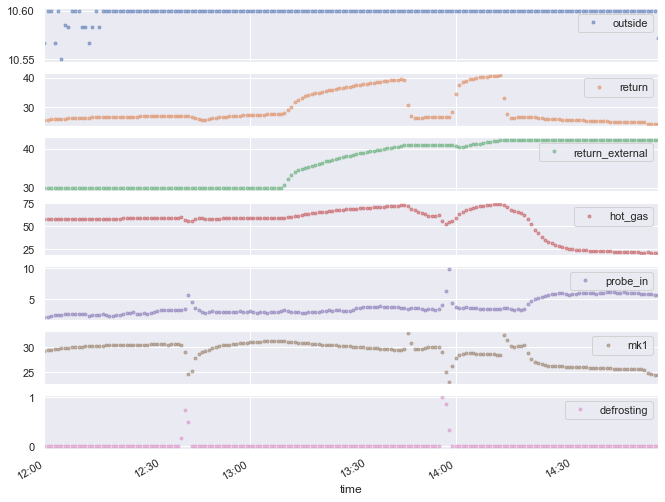

In [19]:
#merged_df.resample('1Min').mean()
display(win)
# todo: How to resample boolean columns to boolean?
win_resampled = win.ffill().resample('1Min').mean()
display(win_resampled)

sns.set(rc={'figure.figsize':(20, 8)})

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = win_resampled[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [5]:
df_night = merged_df[merged_df.index.hour == 22]
print(df_night.groupby(by=[df_night.index.week])['hot_gas'].mean())
print(df_night.groupby(by=[df_night.index.week])['compressor_heating'].sum())



time
1     14.433574
2     15.800000
3     14.075399
4     15.525028
5     17.141829
6     14.537316
7     15.548469
8     15.317804
9     15.924297
10    16.616212
11    16.805267
12    17.097427
13    18.615747
14    19.477051
15    20.537031
16    20.374599
17    20.067411
18    21.521059
19    23.241848
20    22.583965
21    26.299360
22    26.805753
23    25.746602
24    26.052708
25    27.751928
26    28.099902
27    28.113965
28    27.284555
29    28.818042
30    29.028017
31    28.782789
32    27.727880
33    27.712985
34    27.895511
35    27.132382
36    24.837901
37    24.407562
38    23.862086
39    23.326798
40    20.134608
41    21.702313
42    20.926358
43    19.357206
44    18.276557
45    17.362019
46    17.124287
47    17.672892
48    14.656778
49    18.794903
50    17.470110
51    17.442094
52    16.304890
Name: hot_gas, dtype: float64
time
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     16
9      0
10     0
11    10
12     0
13    18
14    29
15

In [21]:
df_plot = merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]

In [16]:
df_plot

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,mk1_reference,starts_compressor1,state,extended_state,compressor_heating,defrosting,heatpump_running,heatpump_heating,heatpump_servicewater
time,,,,,,,,,,,,,,,,,,,
2020-12-20 12:00:03,12.4,27.8,39.7,33.0,44.0,40.0,28.6,58.1,10.6,32.2,0.0,3737,Heatpump running: 01:03:26,heating: 01:03:17,False,False,True,True,False
2020-12-20 12:01:23,12.3,27.9,39.7,33.0,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:46,heating: 01:04:46,False,False,True,True,False
2020-12-20 12:01:34,12.4,27.9,39.7,33.1,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:55,heating: 01:04:55,False,False,True,True,False
2020-12-20 12:04:05,12.3,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.8,32.4,0.0,3737,Heatpump running: 01:07:26,heating: 01:07:26,False,False,True,True,False
2020-12-20 12:04:15,12.4,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.7,32.4,0.0,3737,Heatpump running: 01:07:36,heating: 01:07:26,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 14:31:45,12.2,39.8,39.7,45.5,44.0,42.0,41.2,71.0,11.3,26.8,0.0,3738,Heatpump running: 00:57:05,service water: 00:57:05,False,False,True,False,True
2020-12-20 14:57:02,12.3,29.0,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.3,0.0,3738,Heatpump running: 01:22:11,heating: 01:22:11,False,False,True,True,False
2020-12-20 14:57:12,12.2,29.1,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.4,0.0,3738,Heatpump running: 01:22:21,heating: 01:22:21,False,False,True,True,False


In [61]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"]})
left.set_index('a', inplace=True)
display(left)
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7]})
right.set_index('a', inplace=True)
display(right)
#display(pd.merge_asof(left, right, on="a", allow_exact_matches=False))
dfm = left.merge(right, how='outer', left_index=True, right_index=True, )
dfm
# tolerance = 10)

,left_val
a,
1,a
5,b
10,c


,right_val
a,
1,1
2,2
3,3
6,6
7,7


,right_val
a,
1,1
2,2
3,3
6,6
7,7


In [59]:
rng = pd.date_range("2014-1-1", periods=100, freq="D") + pd.Timedelta("1s")
ts = pd.Series(range(100), index=rng)
ts.resample("3T").sum()
#ts

2014-01-01 00:00:00     0
2014-01-01 00:03:00     0
2014-01-01 00:06:00     0
2014-01-01 00:09:00     0
2014-01-01 00:12:00     0
                       ..
2014-04-09 23:48:00     0
2014-04-09 23:51:00     0
2014-04-09 23:54:00     0
2014-04-09 23:57:00     0
2014-04-10 00:00:00    99
Freq: 3T, Length: 47521, dtype: int64